ID = 170104097

Last 3 digits = 97

---

**Dataset Selection**

97 \% 3 = 1 and so [Dataset 2](https://drive.google.com/file/d/1L7gRzRsyWzQ6jtRg86q81aVfKbREYv2A/view).

---

**Model**


(97 + 2) \% 5 = 99 \% 5 = 4

Hence, the required model is use of **Bidirectional RNN**

---


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [3]:
# The dataset => https://drive.google.com/file/d/1L7gRzRsyWzQ6jtRg86q81aVfKbREYv2A/view
!gdown --id 1L7gRzRsyWzQ6jtRg86q81aVfKbREYv2A

Downloading...
From: https://drive.google.com/uc?id=1L7gRzRsyWzQ6jtRg86q81aVfKbREYv2A
To: /content/Dataset 2.csv
100% 999k/999k [00:00<00:00, 63.3MB/s]


In [4]:
data = pd.read_csv('/content/Dataset 2.csv', engine = 'python')

data.head()

,text,polarity
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [5]:
data = data.sample(frac = 1., random_state = 14).reset_index(drop = True)

print(data['polarity'].value_counts(0))
data

0    8000
1    2314
Name: polarity, dtype: int64


,text,polarity
0,@1WineDude That's a really cool giveaway!,0
1,Need a good web series? Check out GIANTS on Yo...,1
2,Procastinated by doing up a new playlist for T...,0
3,"@ZeenaBoBeena eeeek!!!! Good luck, Zeena!!! Yo...",0
4,@ChynaDoll74 Good morning to you too,0
...,...,...
10309,Summer session starts today Why am I smiling.,0
10310,@Desireeeeee really me to.!,0
10311,@Jason_Pollock I think they heard you.,0
10312,@OliviaMaynard13 You're most welcome. I don't ...,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


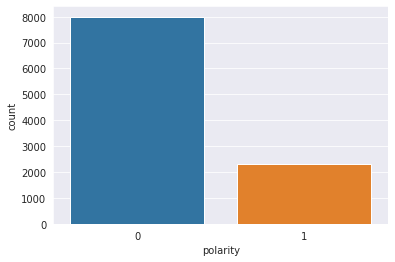

In [6]:
sns.set_style("darkgrid")
sns.countplot(data['polarity'])

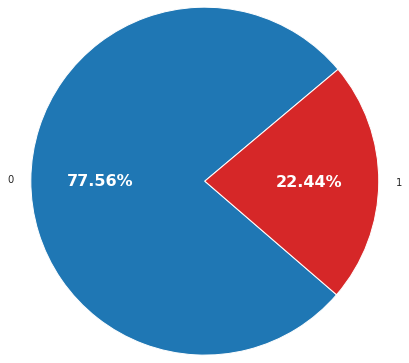

In [7]:
exp_labels=['0','1']

fig1, ax1 = plt.subplots()

_, _, autopcts = ax1.pie(data['polarity'].value_counts(),explode= None, labels=exp_labels,autopct='%0.2f%%',
        radius=2, shadow=False, startangle=40, colors=('tab:blue', 'tab:red') )

plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':16})
plt.show()

## Dividing Dataset
---
Dividing dataset into 6:2:2 ratio as Training:Validation:Testing.

In [8]:
EPOCH = 10

split_val = int(0.2 * data.shape[0])

dataTest = data.iloc[-split_val :]
dataVal = data.iloc[- 2 * split_val : -split_val]
dataTrain = data.iloc[: - 2 * split_val]

In [9]:
print(split_val)
print(len(dataTest))
print(len(dataVal))
print(len(dataTrain))

2062
2062
2062
6190


In [10]:
print(dataTrain['polarity'].value_counts())

dataTrain

0    4784
1    1406
Name: polarity, dtype: int64


,text,polarity
0,@1WineDude That's a really cool giveaway!,0
1,Need a good web series? Check out GIANTS on Yo...,1
2,Procastinated by doing up a new playlist for T...,0
3,"@ZeenaBoBeena eeeek!!!! Good luck, Zeena!!! Yo...",0
4,@ChynaDoll74 Good morning to you too,0
...,...,...
6185,"free draw, lit easily, puffing away",0
6186,Depression is coming i feel it my veins just w...,1
6187,at gator joe's with heather and then movies to...,0
6188,Ughhh so over nightmares - So Instead of sleep...,0


In [11]:
print(dataVal['polarity'].value_counts())

dataVal

0    1606
1     456
Name: polarity, dtype: int64


,text,polarity
6190,"@pilucha ok, no more drinking away of the sorr...",0
6191,Earl's wearing a tie,0
6192,Loving @gilesbennet teaching style - like Dr S...,0
6193,hangin with ledd nd court.,0
6194,under 24 hours left to vote for @protagonize a...,0
...,...,...
8247,Look at the cute hat I got today...I look scar...,0
8248,@firesty hey ya )) like ur new pic i have one...,0
8249,@Styla73 Thank you.,0
8250,@stephjonesmusic http://twitpic.com/6bclz - ah...,0


In [12]:
print(dataTest['polarity'].value_counts())

dataTest

0    1610
1     452
Name: polarity, dtype: int64


,text,polarity
8252,One of my mini poems. #helenswriting#mentalhea...,1
8253,@y2kprawn you went to college here? Didn't kno...,0
8254,The Young Life Podcast #1 - Depression 101: h...,1
8255,'s hair is so soft today.,0
8256,At the point where I'm legitimately pissed whe...,1
...,...,...
10309,Summer session starts today Why am I smiling.,0
10310,@Desireeeeee really me to.!,0
10311,@Jason_Pollock I think they heard you.,0
10312,@OliviaMaynard13 You're most welcome. I don't ...,1


In [13]:
trainX = np.array(dataTrain.iloc[:, 0])
trainY = np.array(dataTrain.iloc[:, 1])

valX = np.array(dataVal.iloc[:, 0])
valY = np.array(dataVal.iloc[:, 1])

testX = np.array(dataTest.iloc[:, 0])
testY = np.array(dataTest.iloc[:, 1])

In [14]:
top_k = 50000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = top_k,
                                                  oov_token = "<unk>",
                                                  filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(trainX)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

train_seqs = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding = 'pre')
val_seqs = tf.keras.preprocessing.sequence.pad_sequences(val_seqs, padding = 'pre')
test_seqs = tf.keras.preprocessing.sequence.pad_sequences(test_seqs, padding = 'pre')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         2072576   
_________________________________________________________________
bidirectional_14 (Bidirectio (None, None, 256)         65792     
_________________________________________________________________
bidirectional_15 (Bidirectio (None, None, 512)         262656    
_________________________________________________________________
bidirectional_16 (Bidirectio (None, None, 128)         73856     
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 8)                 1064      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 2,475,953
Trainable params: 2,475,953
Non-trainable params: 0
____________________________________________

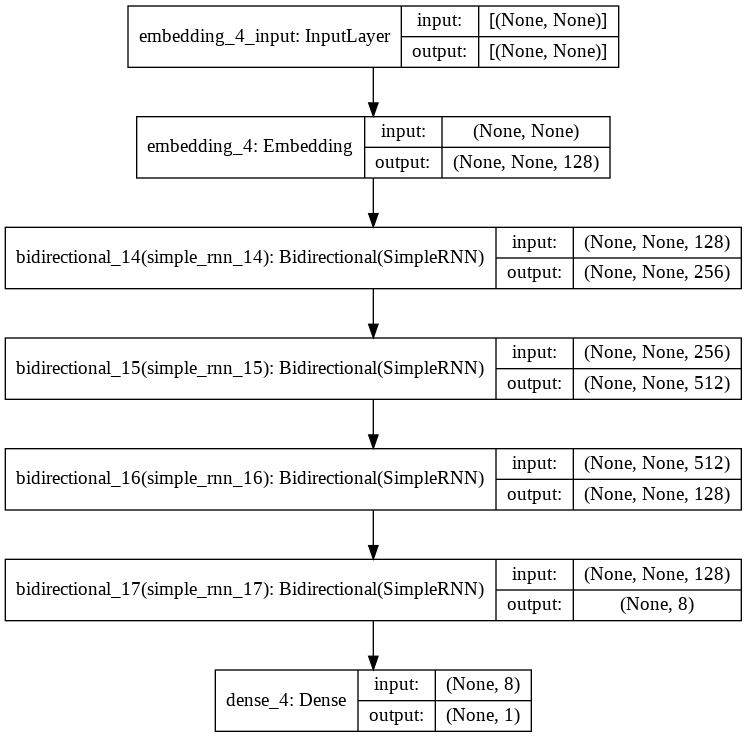

In [56]:
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index), 128))
model.add(layers.Bidirectional(layers.SimpleRNN(128, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.SimpleRNN(256, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.SimpleRNN(64, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.SimpleRNN(4, dropout = 0.2)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

Epoch 1/10
25/25 [==============================] - 33s 1s/step - loss: 0.5449 - accuracy: 0.7565 - val_loss: 0.4953 - val_accuracy: 0.7818
Epoch 2/10
25/25 [==============================] - 24s 976ms/step - loss: 0.3933 - accuracy: 0.8037 - val_loss: 0.3098 - val_accuracy: 0.9064
Epoch 3/10
25/25 [==============================] - 24s 971ms/step - loss: 0.1590 - accuracy: 0.9661 - val_loss: 0.1329 - val_accuracy: 0.9704
Epoch 4/10
25/25 [==============================] - 24s 966ms/step - loss: 0.0837 - accuracy: 0.9964 - val_loss: 0.0915 - val_accuracy: 0.9908
Epoch 5/10
25/25 [==============================] - 24s 963ms/step - loss: 0.0697 - accuracy: 0.9995 - val_loss: 0.0809 - val_accuracy: 0.9932
Epoch 6/10
25/25 [==============================] - 25s 981ms/step - loss: 0.0636 - accuracy: 0.9994 - val_loss: 0.0811 - val_accuracy: 0.9893
Epoch 7/10
25/25 [==============================] - 25s 980ms/step - loss: 0.0583 - accuracy: 0.9995 - val_loss: 0.0715 - val_accuracy: 0.9942
Ep

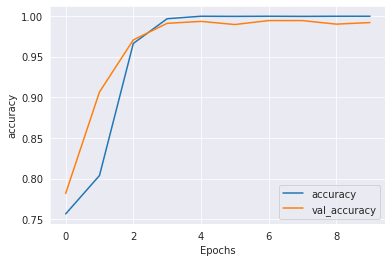

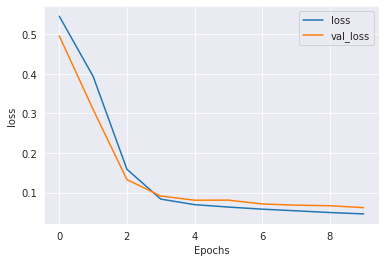


Epoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss
       1   0.756543 	   0.544905 	   0.781765 	   0.495326
       2   0.803716 	   0.393291 	   0.906402 	   0.309811
       3   0.966074 	   0.158973 	   0.970417 	   0.132918
       4   0.996446 	   0.083705 	   0.990786 	   0.091455
       5   0.999515 	   0.069694 	   0.993210 	   0.080900
       6   0.999354 	   0.063621 	   0.989331 	   0.081090
       7   0.999515 	   0.058315 	   0.994180 	   0.071482
       8   0.999354 	   0.054175 	   0.994180 	   0.068415
       9   0.999515 	   0.049854 	   0.989816 	   0.066942
      10   0.999515 	   0.046330 	   0.991756 	   0.062178


In [57]:
history = model.fit(train_seqs, trainY, epochs = EPOCH, batch_size=256, validation_data = (val_seqs, valY), verbose = 1)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

print('\nEpoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['accuracy'][i], history.history['loss'][i], history.history['val_accuracy'][i], history.history['val_loss'][i]))

### Train Data Performance

194/194 [==============================] - 14s 65ms/step - loss: 0.0446 - accuracy: 0.9995
Train Loss: 0.044621989130973816
Train Accuracy: 0.9995153546333313 (Model Metric)
Train Accuracy: 0.9995153473344104 (sklearn Metric)
Train Precision: 1.0
Train Recall: 0.9978662873399715
Train F1-score: 0.9989320042719829


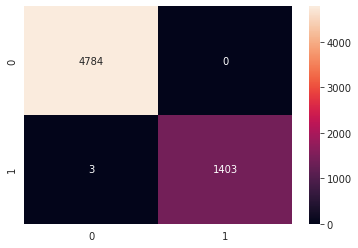

In [58]:
y_pred = model.predict(train_seqs)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(train_seqs, trainY, verbose = 1)
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(trainY, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(trainY, y_pred))
print('Train Recall:', recall_score(trainY, y_pred))
print('Train F1-score:', f1_score(trainY, y_pred))

sns.heatmap(confusion_matrix(trainY, y_pred), annot = True, fmt = 'g')

### Val Data Performance

65/65 [==============================] - 4s 55ms/step - loss: 0.0622 - accuracy: 0.9918
Validation Loss: 0.06217782571911812
Validation Accuracy: 0.9917556047439575 (Model Metric)
Validation Accuracy: 0.9917555771096024 (sklearn Metric)
Validation Precision: 0.9845474613686535
Validation Recall: 0.9780701754385965
Validation F1-score: 0.9812981298129814


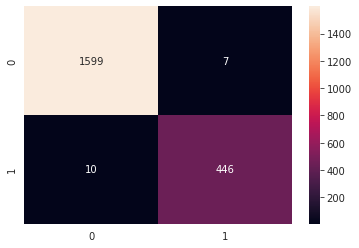

In [59]:
y_pred = model.predict(val_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(val_seqs, valY, verbose = 1)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy, '(Model Metric)')
print('Validation Accuracy:', accuracy_score(valY, y_pred), '(sklearn Metric)')
print('Validation Precision:', precision_score(valY, y_pred))
print('Validation Recall:', recall_score(valY, y_pred))
print('Validation F1-score:', f1_score(valY, y_pred))

sns.heatmap(confusion_matrix(valY, y_pred), annot = True, fmt = 'g')

### Test Data Performance

65/65 [==============================] - 4s 50ms/step - loss: 0.0565 - accuracy: 0.9952
Test Loss: 0.056538719683885574
Test Accuracy: 0.9951503276824951 (Model Metric)
Test Accuracy: 0.9951503394762367 (sklearn Metric)
Test Precision: 0.9933035714285714
Test Recall: 0.9845132743362832
Test F1-score: 0.9888888888888889


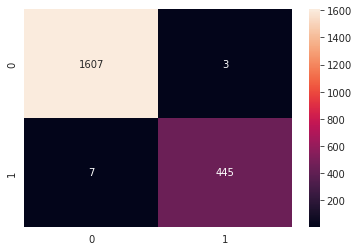

In [60]:
y_pred = model.predict(test_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(test_seqs, testY, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy, '(Model Metric)')
print('Test Accuracy:', accuracy_score(testY, y_pred), '(sklearn Metric)')
print('Test Precision:', precision_score(testY, y_pred))
print('Test Recall:', recall_score(testY, y_pred))
print('Test F1-score:', f1_score(testY, y_pred))

sns.heatmap(confusion_matrix(testY, y_pred), annot = True, fmt = 'g')